In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### **Dataset**

- Descripción: Contiene 442 registros de pacientes con diabetes.
- Objetivo: Predecir una medida cuantitativa de la progresión de la enfermedad un año después de la primera evaluación.
- Tamaño: Incluye 442 muestras y 10 variables predictoras.

In [2]:
# 1. Cargar el dataset y convertirlo a un DataFrame de pandas
diabetes = load_diabetes()
df = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], columns=diabetes['feature_names'] + ['target'])

print("--- Análisis de Información del DataFrame ---")
df.shape

--- Análisis de Información del DataFrame ---


(442, 11)

### **Descripción de las Variables**

El dataset consta de 10 variables de referencia fisiológicas, que están normalizadas y centradas en la media (media cero y varianza unitaria), y una variable objetivo.

**Variables predictoras (características):**

- age: Edad del paciente.

- sex: Género del paciente.

- bmi: Índice de masa corporal.

- bp: Presión arterial media.

- s1, s2, s3, s4, s5, s6: Seis mediciones de suero sanguíneo.

**Variable objetivo:**

- target: Una medida de la progresión de la enfermedad un año después del inicio del estudio.

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Aquí cargamos el dataset de diabetes y lo convertimos en un DataFrame de pandas para facilitar su análisis.
La función df.info() nos muestra cuántas filas y columnas tiene el conjunto de datos, los tipos de variables y si hay valores nulos.
Esto nos ayuda a conocer la estructura de los datos y asegurarnos de que la información se ha cargado correctamente antes de comenzar el análisis.

In [5]:
# 2. Estadísticas Descriptivas de las Características Numéricas
print("\n--- Estadísticas Descriptivas de las Características Numéricas ---")
print(df.describe())


--- Estadísticas Descriptivas de las Características Numéricas ---
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17 

Las estadísticas descriptivas nos ofrecen una visión general de las variables numéricas: media, desviación estándar, valores mínimos y máximos, y percentiles.
Sirven para identificar valores atípicos, diferencias de escala entre variables y rangos de variación que pueden influir en modelos posteriores.


--- Distribución de la Variable Objetivo (Nivel de Progresión de la Enfermedad) ---


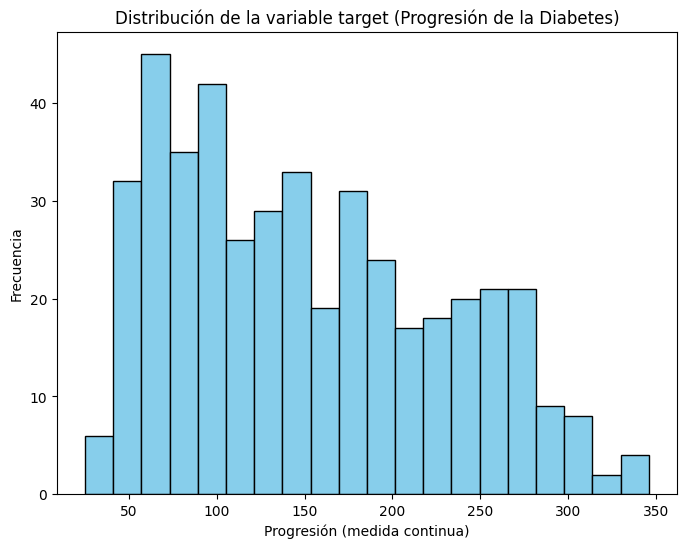

In [6]:
# 3. Análisis de la variable objetivo (target)
print("\n--- Distribución de la Variable Objetivo (Nivel de Progresión de la Enfermedad) ---")
plt.figure(figsize=(8, 6))
plt.hist(df['target'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable target (Progresión de la Diabetes)')
plt.xlabel('Progresión (medida continua)')
plt.ylabel('Frecuencia')
plt.show()

La variable target representa el grado de progresión de la enfermedad, medido en una escala continua.
El histograma muestra cómo se distribuyen esos valores.
Podemos observar si hay sesgo (por ejemplo, más pacientes con baja progresión que con alta) o si la variable sigue una distribución aproximadamente normal.
Esto ayuda a entender el comportamiento general de la enfermedad en el conjunto de datos.


--- Matriz de Correlación ---


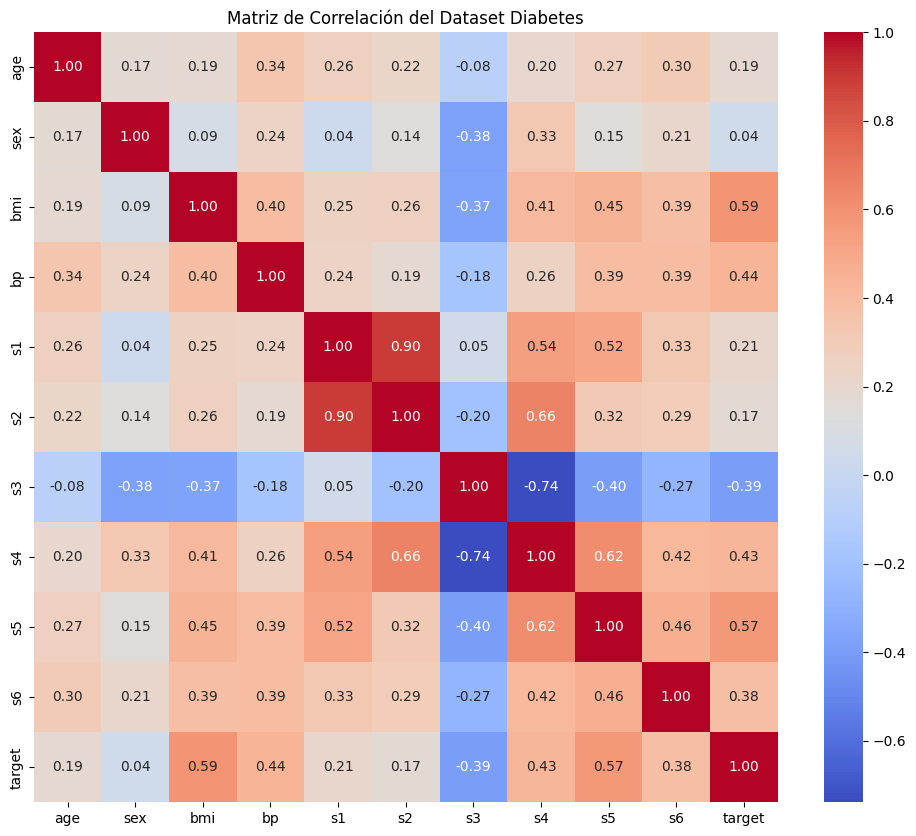

In [7]:
# 4. Matriz de correlación y visualización con Heatmap
print("\n--- Matriz de Correlación ---")
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación del Dataset Diabetes')
plt.show()

La matriz de correlación nos permite ver qué variables están más relacionadas entre sí y con la variable target.
Por ejemplo, un coeficiente alto entre bmi (índice de masa corporal) y target sugiere que el peso corporal tiene una fuerte relación con la progresión de la diabetes.
Esta información es muy útil para la selección de variables en modelos predictivos.


--- Visualización de la Distribución de Variables Clave ---


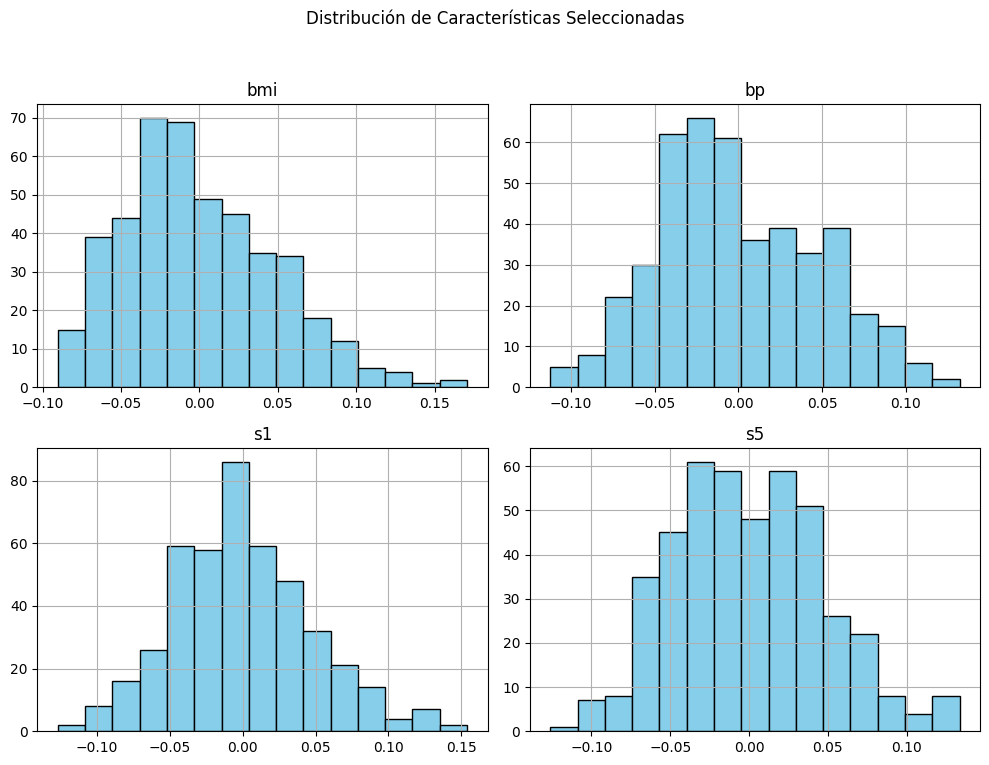

In [8]:
# 5. Histograma para visualizar la distribución de algunas características
print("\n--- Visualización de la Distribución de Variables Clave ---")
selected_features = ['bmi', 'bp', 's1', 's5']
df[selected_features].hist(figsize=(10, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Características Seleccionadas')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Los histogramas muestran la distribución individual de algunas variables relevantes (bmi, bp, s1, s5).
Podemos ver si los valores están concentrados en ciertos rangos o si presentan dispersión.
Este tipo de análisis ayuda a identificar posibles normalizaciones necesarias o patrones que se relacionen con la enfermedad.

/tmp/ipykernel_20087/1329863922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.qcut(df['target'], q=4), y='bmi', data=df, palette='Set2')


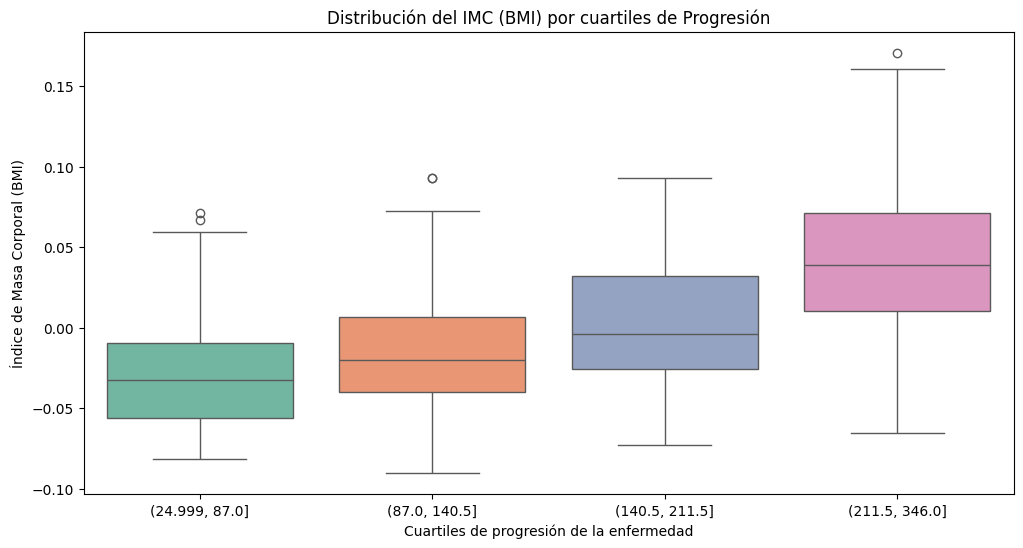

In [9]:
# 6. Boxplots para comparar distribuciones de características con respecto al target
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.qcut(df['target'], q=4), y='bmi', data=df, palette='Set2')
plt.title("Distribución del IMC (BMI) por cuartiles de Progresión")
plt.xlabel("Cuartiles de progresión de la enfermedad")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.show()

El boxplot compara los valores del índice de masa corporal (bmi) entre distintos niveles de progresión (divididos en cuartiles).
Permite ver si existe una tendencia: por ejemplo, si los pacientes con mayor progresión tienden a tener un bmi más alto.
Las cajas muestran la mediana, los rangos intercuartílicos y los posibles valores atípicos.

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

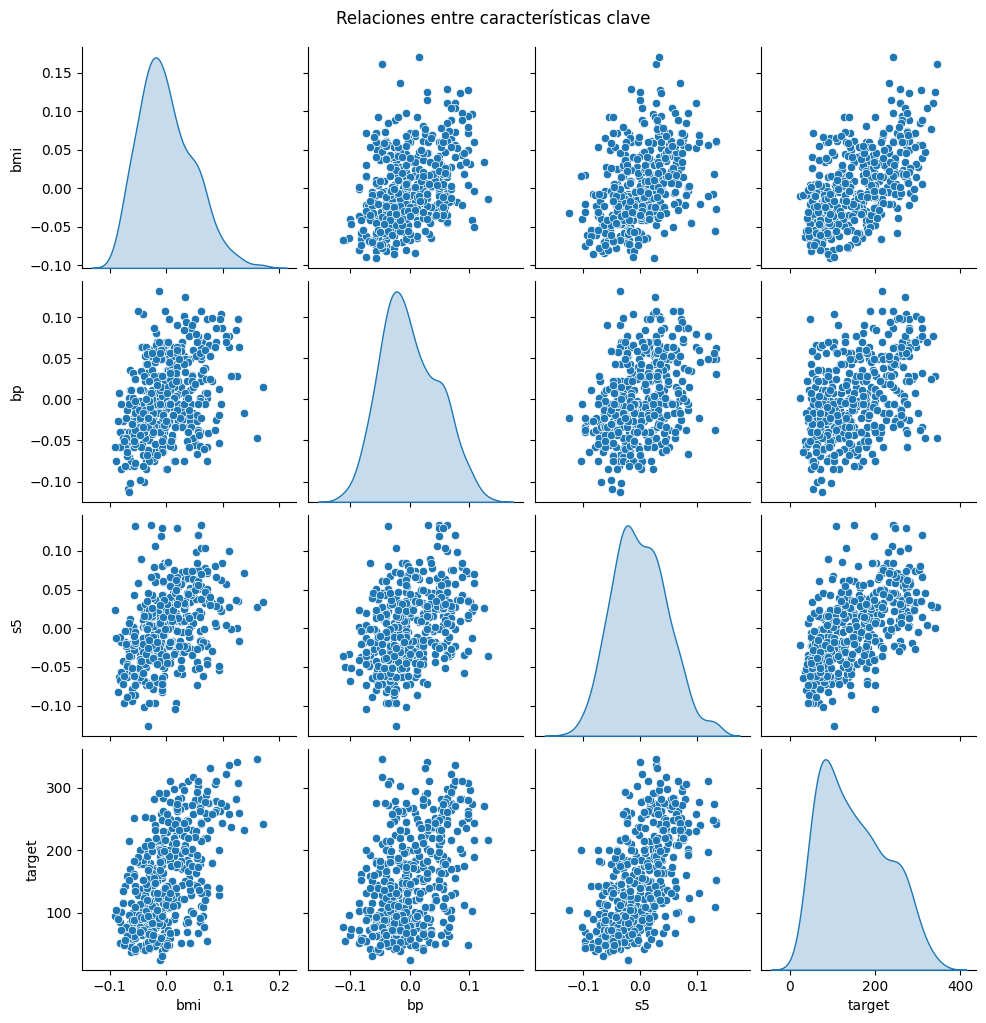

In [10]:
# 7. Pairplot (gráfico de dispersión cruzado entre variables seleccionadas)
sns.pairplot(df[['bmi', 'bp', 's5', 'target']], diag_kind="kde", palette="Set1")
plt.suptitle("Relaciones entre características clave", y=1.02)
plt.show()

El pairplot muestra las relaciones entre pares de variables y su densidad.
Podemos observar patrones lineales, correlaciones o dispersiones entre variables como el índice de masa corporal (bmi), la presión sanguínea (bp) y el indicador metabólico s5.
Este tipo de gráfico facilita la identificación de combinaciones de variables que podrían explicar la progresión de la enfermedad.

In [11]:
# 8. Análisis de varianza (ANOVA simplificado: diferencias entre cuartiles del target)

df['target_quartile'] = pd.qcut(df['target'], q=4, labels=False)
f_stat, p_val = f_oneway(
    df[df['target_quartile'] == 0]['bmi'],
    df[df['target_quartile'] == 1]['bmi'],
    df[df['target_quartile'] == 2]['bmi'],
    df[df['target_quartile'] == 3]['bmi']
)
print(f"\nANOVA en BMI entre cuartiles de progresión: F = {f_stat:.2f}, p = {p_val:.5f}")


ANOVA en BMI entre cuartiles de progresión: F = 67.51, p = 0.00000


El ANOVA evalúa si hay diferencias significativas en la media del bmi entre los distintos cuartiles de progresión.
Un valor de p pequeño (por debajo de 0.05) indica que el bmi varía significativamente entre grupos, lo cual sugiere que esta variable está asociada con la severidad de la diabetes.
Esto refuerza su importancia como predictor potencial.

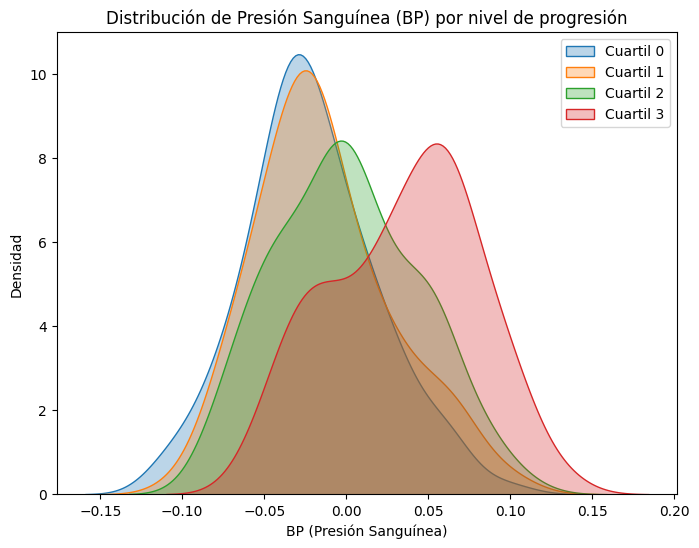

In [12]:
# 9. Visualización de densidad de una variable
plt.figure(figsize=(8,6))
for q in sorted(df['target_quartile'].unique()):
    subset = df[df['target_quartile']==q]
    sns.kdeplot(subset['bp'], label=f"Cuartil {q}", fill=True, alpha=0.3)
plt.title("Distribución de Presión Sanguínea (BP) por nivel de progresión")
plt.xlabel("BP (Presión Sanguínea)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

Aquí comparamos la distribución de la presión sanguínea (bp) entre los distintos niveles de progresión.
Las curvas muestran la forma de las distribuciones y su grado de solapamiento.
Si las curvas están separadas, significa que la presión sanguínea cambia significativamente con el nivel de enfermedad; si se superponen, su poder discriminante es menor.

# CLASIFICACIÓN

In [13]:
# 1. Cargar el dataset real
X = diabetes.data
y_true = df['target_quartile'].values
feature_names = diabetes.feature_names

In [14]:
# 2. Seleccionar 2 variables (bmi y bp)
X_plot = df[['bmi', 'bp']].values

In [15]:
# 3. Aplicar K-Means con 4 clusters (correspondientes a los cuartiles del target)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_plot)
y_kmeans = kmeans.predict(X_plot)

Aplicamos el algoritmo K-Means para agrupar los pacientes en 4 clusters, equivalentes a los cuartiles de progresión.
El modelo no usa la variable target, sino que agrupa según similitudes en bmi y bp.
Esto nos permite evaluar si estos dos indicadores pueden, por sí solos, separar a los pacientes según su nivel de progresión.

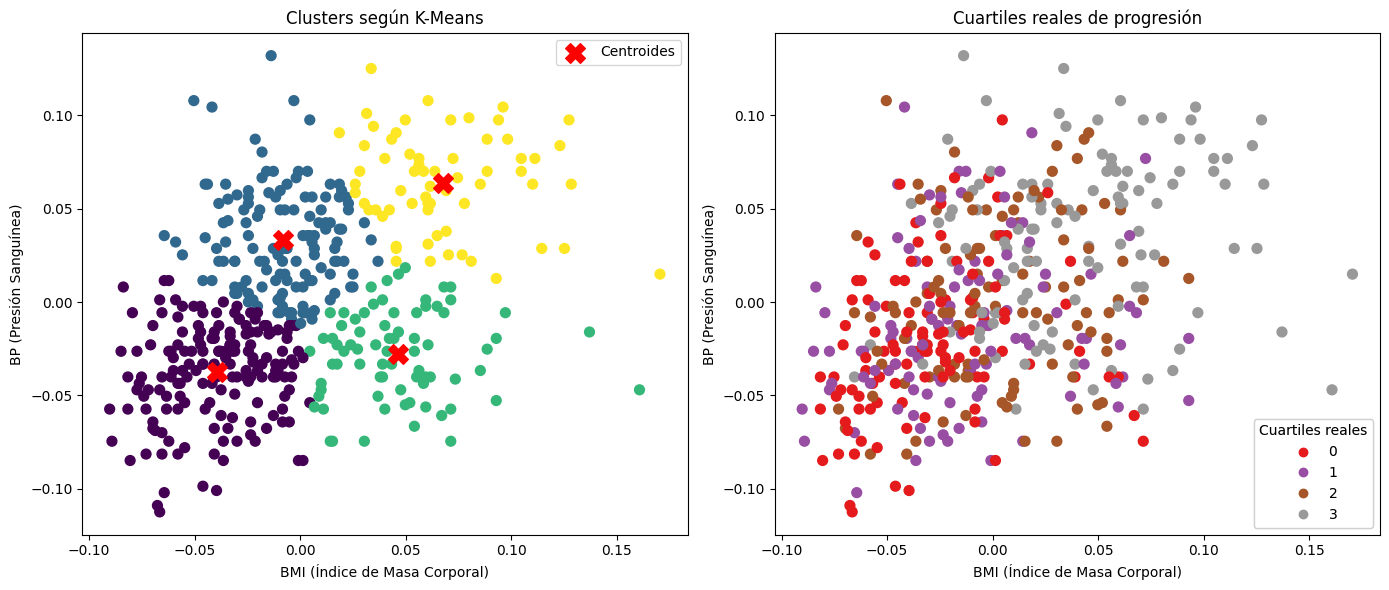

In [16]:
# 4. Visualización comparativa
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# (a) Clusters de K-Means
scatter1 = axes[0].scatter(X_plot[:, 0], X_plot[:, 1], c=y_kmeans, cmap="viridis", s=50)
centers = kmeans.cluster_centers_
axes[0].scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", label="Centroides")
axes[0].set_title("Clusters según K-Means")
axes[0].set_xlabel("BMI (Índice de Masa Corporal)")
axes[0].set_ylabel("BP (Presión Sanguínea)")
axes[0].legend()

# (b) Clases reales (por cuartiles del target)
scatter2 = axes[1].scatter(X_plot[:, 0], X_plot[:, 1], c=y_true, cmap="Set1", s=50)
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Cuartiles reales")
axes[1].add_artist(legend2)
axes[1].set_title("Cuartiles reales de progresión")
axes[1].set_xlabel("BMI (Índice de Masa Corporal)")
axes[1].set_ylabel("BP (Presión Sanguínea)")

plt.tight_layout()
plt.show()

Se comparan los clusters obtenidos por K-Means con los cuartiles reales de progresión.
El primer gráfico muestra los grupos detectados automáticamente por el algoritmo y los centroides (en rojo).
El segundo gráfico muestra los cuartiles reales.
Comparar ambos permite evaluar visualmente el grado de coincidencia entre el agrupamiento automático y la clasificación real.

In [17]:
# 5. Clasificar un nuevo registro
nuevo_registro = np.array([[0.05, 0.04]])  # Ejemplo de paciente medio
cluster_predicho = kmeans.predict(nuevo_registro)
print(f"El nuevo registro {nuevo_registro.tolist()[0]} pertenece al cluster: {cluster_predicho[0]}")

El nuevo registro [0.05, 0.04] pertenece al cluster: 3


Simulamos un nuevo paciente con valores medios de bmi y bp para ver a qué cluster pertenecería.
Esto demuestra cómo un modelo de clustering puede utilizarse para estimar la “similaridad” de nuevos casos respecto a grupos ya formados, aunque no sepamos su nivel real de progresión.

### Metricas

In [18]:
# silhouette_score
sil_score = silhouette_score(X_plot, y_kmeans)
print("Silhouette Score:", sil_score)

# Adjusted Rand Index
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_true, y_kmeans)
print("Adjusted Rand Index:", ari)

# Homogeneity, Completeness, V-Measure
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
print("Homogeneity:", homogeneity_score(y_true, y_kmeans))
print("Completeness:", completeness_score(y_true, y_kmeans))
print("V-Measure:", v_measure_score(y_true, y_kmeans))

Silhouette Score: 0.3914888631851684
Adjusted Rand Index: 0.09676766357959532
Homogeneity: 0.1298371076422291
Completeness: 0.13742776143459903
V-Measure: 0.1335246425469065


**Silhouette Score:** 
El Silhouette Score mide la calidad del agrupamiento.
Un valor cercano a 1 indica clusters bien definidos y separados; valores cercanos a 0 muestran solapamiento entre grupos.
En este caso, sirve para evaluar si bmi y bp realmente distinguen bien entre los diferentes niveles de progresión.
Con un valor de 0.39, el Silhouette Score sugiere que, aunque los clústeres no se solapan por completo, tampoco están muy bien separados. Esto indica que la elección de 4 clústeres con las variables bmi y bp no ha generado una estructura de datos clara y bien definida.

**Adjusted Rand Index:** 
El Adjusted Rand Index compara los clusters obtenidos con las clases reales (cuartiles).
Un valor de 1 significa coincidencia perfecta; 0, aleatoria.
Como K-Means no conoce las etiquetas reales, valores moderados son esperables y muestran que el agrupamiento captura parcialmente la estructura real de los datos.
Con un valor de 0.097, el ARI está muy cerca de cero, lo que significa que la clasificación de los datos en 4 clústeres por K-Means es casi aleatoria en comparación con los cuartiles reales de progresión de la enfermedad

**Homogeneity:** 
cada cluster contiene muestras de una sola clase (pureza).
Con un valor de 0.130, la homogeneidad es muy baja. Esto indica que los clústeres creados por el algoritmo de K-Means son "impuros", es decir, contienen pacientes de diferentes cuartiles de progresión de la enfermedad mezclados en el mismo clúster.

**Completeness:** 
todas las muestras de una clase están en el mismo cluster (consistencia).
Con un valor de 0.137, la completitud es muy baja. Esto indica que los pacientes de un mismo cuartil de progresión se han dispersado en varios clústeres distintos, en lugar de estar bien agrupados en uno solo.

**V-Measure:** 
combina ambas en una media armónica.
Con un valor de 0.134, el V-Measure es muy bajo. Esto refuerza la conclusión de que la agrupación por K-Means no se alinea bien con las clases reales de progresión de la enfermedad, lo que significa que el algoritmo no ha logrado identificar patrones que correspondan a los cuartiles de progresión.